1000 100000 0.648492
325


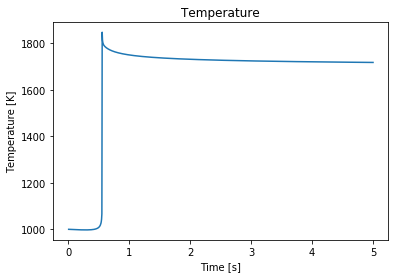

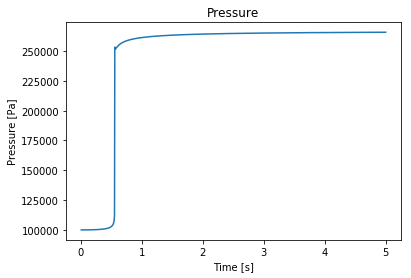

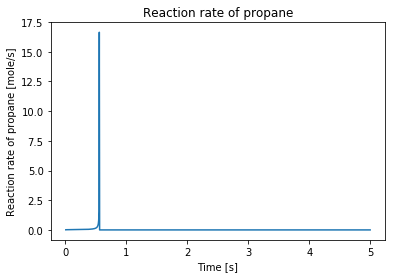

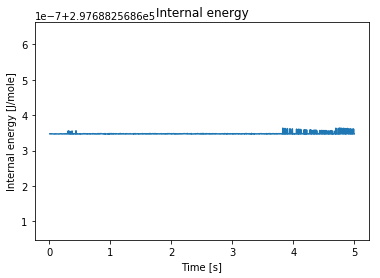

In [141]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

#deklaracja mieszaniny propan - powietrze
mieszanina = ct.Solution('gri30.xml')
temperatura0 = 1000
cisnienie0 = 10**5
stezenie1= 0.70
a= 1/stezenie1
mieszanina.TPX = temperatura0, cisnienie0, {'C3H8':1, 'O2':1*a, 'N2':a*3.76}
volume0 = (1 + 4.76*a) * 8.314 * temperatura0 / cisnienie0
moles_propane0 = mieszanina['C3H8'].X
reaction_rate = []
print (temperatura0, cisnienie0, volume0)

time = 0
delta_t = 0.005
#inicjalizacja reakcji
r = ct.Reactor(mieszanina, volume = volume0)
sim = ct.ReactorNet([r])
states = ct.SolutionArray(mieszanina, extra = ['t'])

#otwarcie pliku txt na wyniki
wyniki = open('wyniki_mkws.txt', 'w')
wyniki.write('%5s\t%10s\t%10s\t%10s\t%10s\n' % ('L.p.', 't [s]', 'T [K]', 'P [Pa]', 'q [J]'))


for n in range(1000) :
 time += delta_t
 sim.advance(time)
 states.append(r.thermo.state, t=time)
 q = np.dot(mieszanina.net_rates_of_progress, mieszanina.delta_enthalpy)         #wydzielone ciepło
 #print (str(r.thermo.T), str(r.thermo.P), str(q))
 reaction_rate.append((moles_propane0 - mieszanina['C3H8'].X) / delta_t)          #prędkość reakcji
 moles_propane0 = mieszanina['C3H8'].X   
 wyniki.write('%5d\t%10.3f\t%10.3f\t%10.3e\t%10.3e\n' % (n, time, r.thermo.T, r.thermo.P, q))
 
wyniki.close()

print (r.kinetics.n_reactions)
#print (states.u)

#matplotlib
plt.figure()
plt.plot(states.t, states.T)
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.title('Temperature')
plt.figure()
plt.plot(states.t, states.P)
plt.xlabel('Time [s]')
plt.ylabel('Pressure [Pa]')
plt.title('Pressure')
plt.figure()
plt.plot(states.t, reaction_rate)
plt.xlabel('Time [s]')
plt.ylabel('Reaction rate of propane [mole/s]')
plt.title('Reaction rate of propane')
plt.figure()
plt.plot(states.t, states.u)
plt.xlabel('Time [s]')
plt.ylabel('Internal energy [J/mole]')
plt.title('Internal energy')
plt.show()